In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy as sym
from sympy import Symbol

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 'large',
    'figure.dpi': 100,
})

In [2]:
# Get partial derivatives of r with respect to variables with error. 
d, λ, m = sym.symbols('d λ m')
r = d / (m * λ/2)
r, r.diff(d), r.diff(λ), r.diff(m)

(2*d/(m*λ), 2/(m*λ), -2*d/(m*λ**2), -2*d/(m**2*λ))

In [3]:
# Measurements.
λ, Δλ = 632.8e-9, 0.1e-9
d_0 = 1e-3 * np.array([10.79, 5.40, 10.00])
d_k = 1e-3 * np.array([10.88, 5.49, 10.08])
d, Δd = np.mean(np.abs(d_k - d_0)), 0.01e-3
m, Δm = 50, 3

In [4]:
print(''.join([f'{i} & {1e3 * d_0:.2f} & {1e3 * d_k:.2f} & {1e3 * np.abs(d_k - d_0):.2f} \\\\\n'
               for i, d_0, d_k in zip([1, 2, 3], d_0, d_k)]))

1 & 10.79 & 10.88 & 0.09 \\
2 & 5.40 & 5.49 & 0.09 \\
3 & 10.00 & 10.08 & 0.08 \\



In [5]:
# Calculate gear ratio r and its error.
r = d / (m * λ/2)
Δr = np.sqrt(
    (2/(λ*m) * Δd)**2 +
    (-2*d/(λ**2 * m) * Δλ)**2 +
    (-2*d/(λ * m**2) * Δm)**2)
r, Δr, Δr/r

(5.478297513695776, 0.7124659016305145, 0.13005242958224622)

In [10]:
# Import measurements of pressures p - p_0 and number m of interference bands that
# passed by from the starting pressure.
with open('measurements/pressure-ior.csv') as file:
    p, m_2 = np.array([[float(el) for el in row.rstrip().split(',')]
                     for row in file.readlines()]).T

# Calculate k = dn/dp.
p_0 = 2.4e5
m = m_2 / 2
l, Δl = 50e-3, 1e-3
Δp = p_0 - p
Δn = m*λ/(2*l)
par, cov = np.polyfit(Δp, Δn, 1, cov=True)
k, c = par
σ_k, σ_c = np.sqrt(np.diag(cov))

In [7]:
print(''.join([f'{1e-5 * -Δp:.1f} & {int(2*m)} & {1e3 * -Δn:.2f} \\\\\n'
               for Δp, m, Δn in zip(Δp, m, Δn)]))

-0.0 & 0 & -0.00 \\
-0.2 & 20 & -0.06 \\
-0.2 & 21 & -0.07 \\
-0.2 & 19 & -0.06 \\
-0.4 & 41 & -0.13 \\
-0.4 & 40 & -0.13 \\
-0.4 & 40 & -0.13 \\
-0.6 & 61 & -0.19 \\
-0.6 & 59 & -0.19 \\
-0.6 & 60 & -0.19 \\
-0.8 & 82 & -0.26 \\
-0.8 & 79 & -0.25 \\
-0.8 & 83 & -0.26 \\
-1.0 & 103 & -0.33 \\
-1.0 & 104 & -0.33 \\
-1.0 & 100 & -0.32 \\
-1.2 & 123 & -0.39 \\
-1.2 & 124 & -0.39 \\
-1.2 & 121 & -0.38 \\
-1.4 & 146 & -0.46 \\
-1.4 & 143 & -0.45 \\
-1.4 & 144 & -0.46 \\
-1.6 & 163 & -0.52 \\
-1.6 & 163 & -0.52 \\
-1.6 & 162 & -0.51 \\
-1.8 & 178 & -0.56 \\
-2.0 & 199 & -0.63 \\
-2.2 & 215 & -0.68 \\



In [8]:
1e3 * 1e5 * k, 1e3 * 1e5 * σ_k, c, σ_c

(0.31710064141722677,
 0.0024316157398150007,
 3.0383677458767077e-06,
 2.778555165906522e-06)

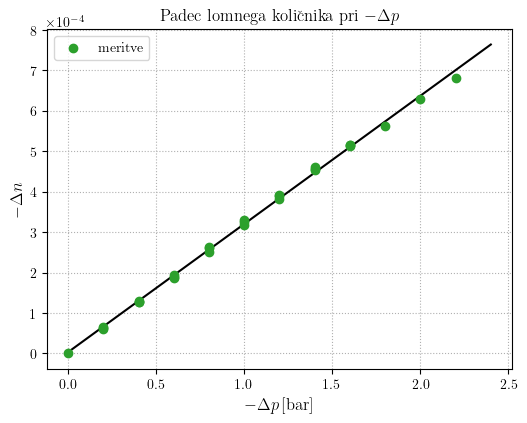

In [16]:
# Plot.
fig, ax = plt.subplots(1, 1, figsize=[6, 4.5])

# Magnetisation curve.
ax.scatter(1e-5 * Δp, Δn, color='tab:green', zorder=3, label='meritve')
p_lin = np.linspace(0, p_0)
ax.plot(1e-5 * p_lin, k*p_lin + c, color='black')

# Labels and style.
ax.set_title("Padec lomnega količnika pri $-\Delta p$")
ax.set_xlabel(r'$-\Delta p\,[\mathrm{bar}]$')
ax.set_ylabel(r"$-\Delta n$")
ax.grid(linestyle=':')
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.legend()
fig.savefig('pressure-fit.pdf')

In [ ]:
# Coherence length
m, Δm = 12, 4
λ_mean = 550e-9
c = 299_792_458
m*λ_mean, λ_mean*Δm, m*λ_mean/c, λ_mean*Δm/c

(6.6e-06, 1.65e-06, 2.2015230283078035e-14, 5.503807570769509e-15)

In [69]:
# Sodium doublet.
d_0 = 1e-3 * np.array([5.00, 5.00, 5.00])
d_k = 1e-3 * np.array([4.93, 4.93, 4.92])
d, Δd = np.mean(np.abs(d_k - d_0)), 0.01e-3
m, Δm = 50, 3

λ_mean = 2*d/(m*r)
Δλ_mean = np.sqrt(
    (2/(m*r) * Δd)**2 +
    (-2*d/(m**2 * r) * Δm)**2 +
    (-2*d/(m * r**2) * Δr)**2
)
1e9 * λ_mean, 1e9 * Δλ_mean

(535.4461538461543, 105.88936861170126)

In [120]:
D_0 = 1e-3 * np.array([0.43, 0.43, 0.43])
D_k = 1e-3 * np.array([11.60, 14.64, 16.42])
D, ΔD = np.mean(np.abs(D_k - D_0)), 0.01e-3

Δλ = λ_mean**2 * 9*r/(2*D)
ΔΔλ = np.sqrt(
    (2*λ_mean * 9*r/(2*D) * Δλ_mean)**2 +
    (λ_mean**2 * 9/(2*D) * Δr)**2 +
    (-λ_mean**2 * 9*r/(2*D**2) * ΔD)**2
)
1e9 * Δλ, 1e9 * ΔΔλ

(0.5125372901210502, 0.213395849153573)

In [112]:
print(''.join([f'{i} & {1e3 * d_0:.2f} & {1e3 * d_k:.2f} & {1e3 * np.abs(d_k - d_0):.2f} & {1e3 * D_0:.2f} & {1e3 * D_k:.2f} & {1e3 * np.abs(D_k - D_0):.2f} \\\\\n'
               for i, d_0, d_k, D_0, D_k in zip([1, 2, 3], d_0, d_k, D_0, D_k)]))

1 & 5.00 & 4.93 & 0.07 & 0.43 & 11.60 & 11.17 \\
2 & 5.00 & 4.93 & 0.07 & 0.43 & 14.64 & 14.21 \\
3 & 5.00 & 4.92 & 0.08 & 0.43 & 16.42 & 15.99 \\



733.3333333333383